In [2]:
from scipy.stats import zscore
from scipy.ndimage import gaussian_filter1d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import zscore
import os
import urllib.request
%matplotlib inline

# download 2-photon data (if not already downloaded)
if not os.path.isfile('data/mesoscope_activity.npy'):
    if not os.path.exists('data'):
        os.mkdir('data')
    response = urllib.request.urlopen('http://www.gatsby.ucl.ac.uk/~cstringer/mesoscope_activity.npy');
    f=open('data/mesoscope_activity.npy','wb')
    f.write(response.read())
    f.close()

# load downloaded data
dat = np.load('data/mesoscope_activity.npy')
dat = dat.item()
sp  = dat['spks']
sp  = zscore(sp, axis=1)
xyloc = dat['xyloc']

In [4]:
xyloc

array([[ 788. , 2094. ],
       [ 811. , 2275. ],
       [ 599. , 2218.5],
       ...,
       [1325. , 2350. ],
       [1337. , 2031. ],
       [1163. , 2025. ]])

In [6]:
# rastermap algorithm
import sys
sys.path.append('rastermap/rastermap')
import mapping, imp
imp.reload(mapping)

model = mapping.Rastermap(n_components=1, n_X=100).fit(sp)

nmin 200
0.09191727638244629
1.4922828674316406
1.5485293865203857
1.558485507965088
(98, 100)
(130,)
1.0
time; iteration;  explained PC variance
0.25s     0        0.0313      2
0.41s    10        0.1412      4
0.56s    20        0.1874      8
0.70s    30        0.2411      18
0.84s    40        0.2678      28
0.98s    50        0.2871      38
1.13s    60        0.3026      48
1.26s    70        0.3121      58
1.42s    80        0.3215      68
1.58s    90        0.3308      78
1.73s    100        0.3401      88
1.87s    110        0.3504      98
2.01s    120        0.3512      98
2.15s   final      0.3513
2.15s upsampled    0.3513


In [7]:
### sort neurons and smooth across neurons and zscore in time
isort = np.argsort(model.embedding[:,0])
Sm = gaussian_filter1d(sp[isort,:].T, np.minimum(3,int(sp.shape[0]*0.005)), axis=1)
Sm = Sm.T

# (optional) smooth in time
#Sm = gaussian_filter1d(Sm, 1, axis=1)


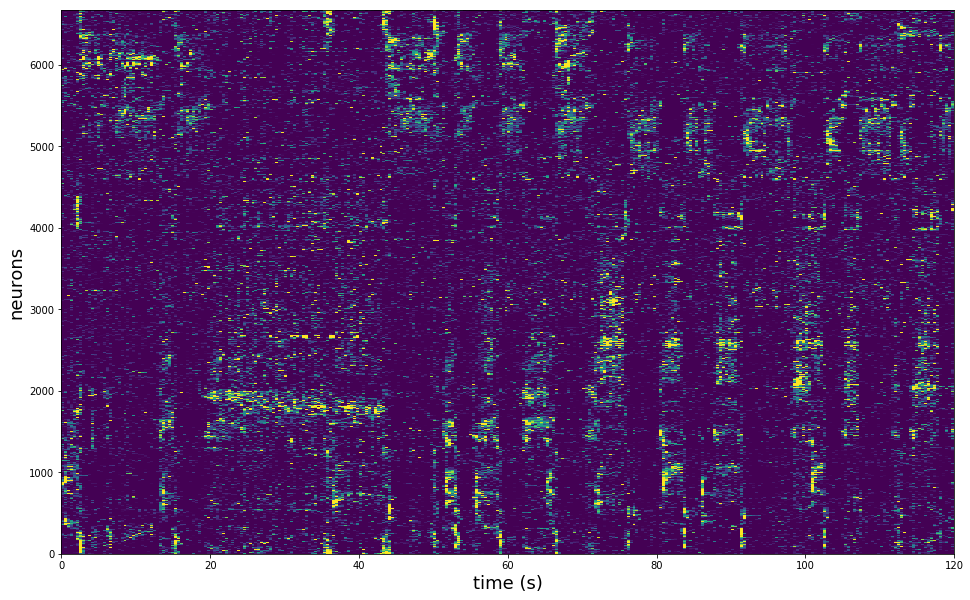

In [8]:
### view neuron sorting
fs = 2.5 # sampling rate of data in Hz
splot = Sm[::-1,1500:1800]
plt.figure(figsize=(16,10))
ax=plt.imshow(splot, vmin=0,vmax=1.5,aspect='auto',extent=[0,splot.shape[1]/fs, 0,splot.shape[0]])
plt.xlabel('time (s)', fontsize=18)
plt.ylabel('neurons', fontsize=18)
plt.show()

In [ ]:
### view neuron sorting
fs = 2.5 # sampling rate of data in Hz
splot = Sm[::-1,model.isort2]
plt.figure(figsize=(16,10))
ax=plt.imshow(splot, vmin=0,vmax=1.5,aspect='auto',extent=[0,splot.shape[1]/fs, 0,splot.shape[0]])
plt.xlabel('time (s)', fontsize=18)
plt.ylabel('neurons', fontsize=18)
plt.show()

In [ ]:
### view positions of cells colored by rastermap

# colormap
cmap = cm.get_cmap('hsv')
cmap = cmap(np.linspace(0.,1,sp.shape[0]))

plt.figure(figsize=(8,8))
# assign color based on embedding
plt.scatter(xyloc[:,0], xyloc[:,1], s=4, color=cmap[isort,:])
plt.xlabel('x location (um)')
plt.ylabel('y location (um)');
plt.show()